In [1]:
library('igraph')
library(gsubfn)
library(resample)
library('Matrix')
library('pracma')
library(latex2exp)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: proto


Attaching package: ‘resample’


The following object is masked from ‘package:gsubfn’:

    cat0



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




In [2]:
n = 900
p = 0.015
g <- sample_gnp(n=n, p=p, directed=F)

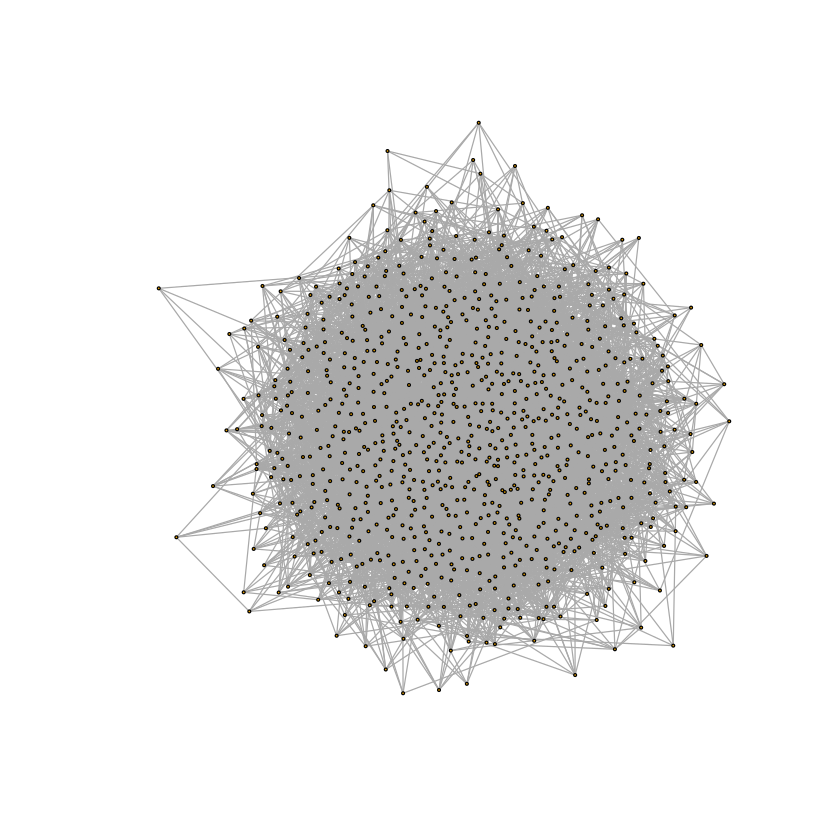

In [35]:
plot(g, vertex.size=1, vertex.label=NA)

In [36]:
png(sprintf("plots/q1_a_graph.png"))
plot(g, vertex.size=1, vertex.label=NA)
dev.off()

png 
  2

In [10]:

get_gcc = function(g){
    if(is_connected(g)) return (g)
    else{
        g.components <- clusters(g)
        gcc_idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == gcc_idx))
        return (gcc)
    }
}
get_shortest_path_and_end_node_degree = function(g, steps = 100){
    start_v = sample(V(g), 1)
    vert_seq = random_walk(g, start=start_v, steps=steps)
    end_node_deg = degree(g, vert_seq[length(vert_seq)])
    shortest_path = shortest.paths(g, vert_seq, start_v)
    return (list(shortest_path, end_node_deg))
}

In [11]:
perform_random_walk = function(g, steps=100, iters=1000){
    shortest_dists = matrix(NA, nrow=iters, ncol=steps)
    end_node_degs = array(NA, iters)
    for(i in 1:iters){
        gcc = get_gcc(g)
        list[shortest_path, end_node_deg] = get_shortest_path_and_end_node_degree(gcc, steps)
        shortest_dists[i,] = shortest_path
        end_node_degs[i] = end_node_deg
    }
    return (list(shortest_dists, end_node_degs))
}

In [12]:
list[shortest_dists,end_node_deg ]  <- perform_random_walk(g)


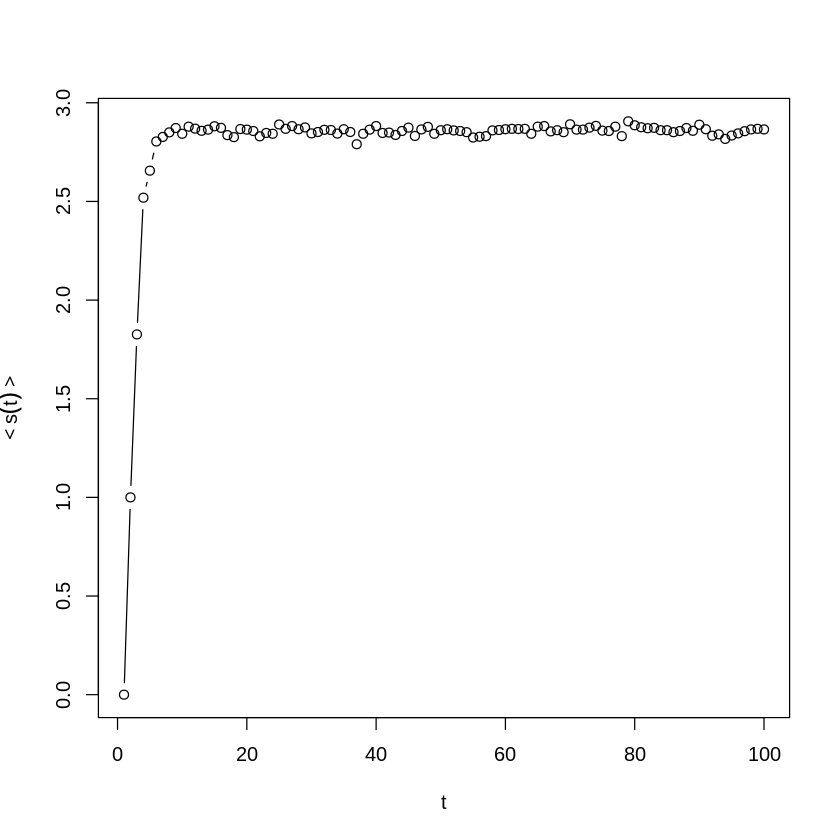

In [47]:
plot(colMeans(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))

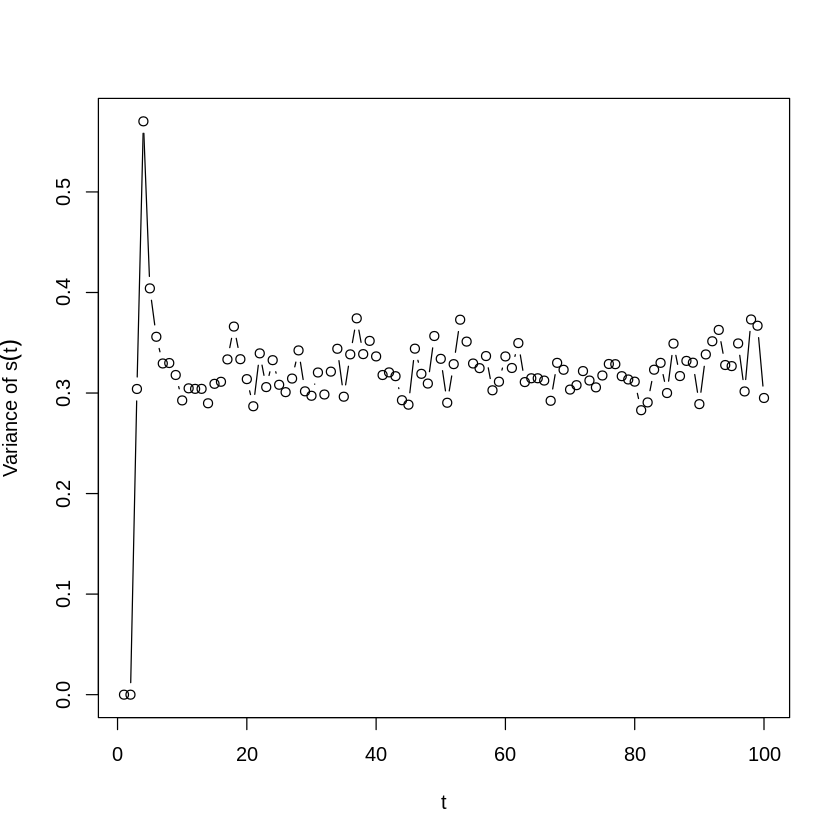

In [48]:
plot(colVars(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))

In [15]:
dir.create(file.path('plots'))
png(sprintf("plots/q1_st.png"))
plot(colMeans(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/q1_var_st.png"))
plot(colVars(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

Warning message in dir.create(file.path("plots")):
“'plots' already exists”


png 
  2

png 
  2

## q1 (c)

In [13]:
degrees = as.numeric(names(table(end_node_deg)))
degree_freq = as.vector(table(end_node_deg))

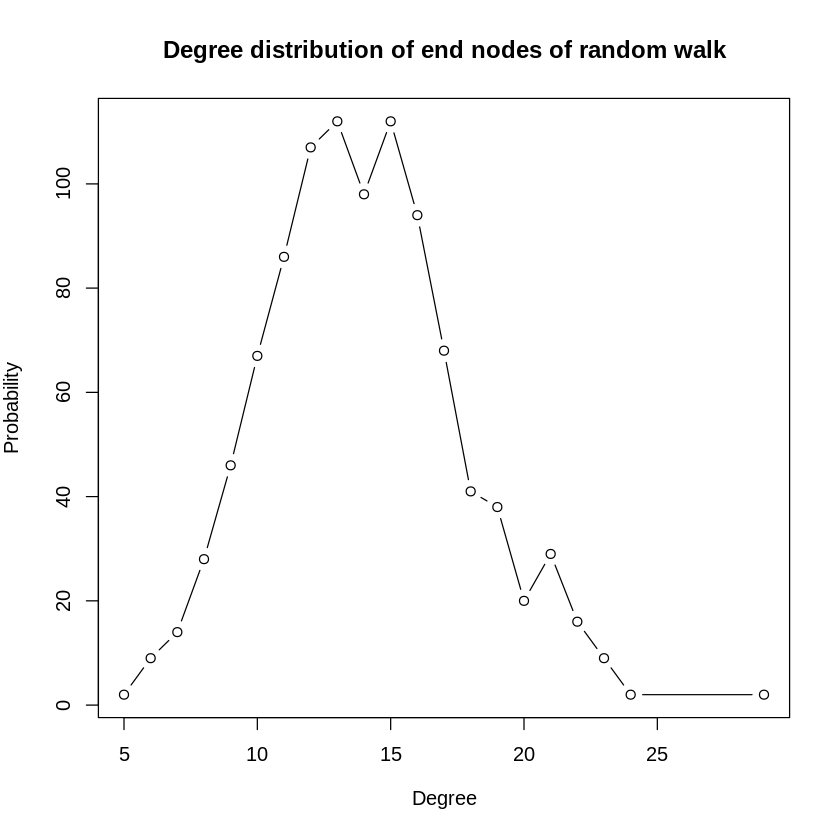

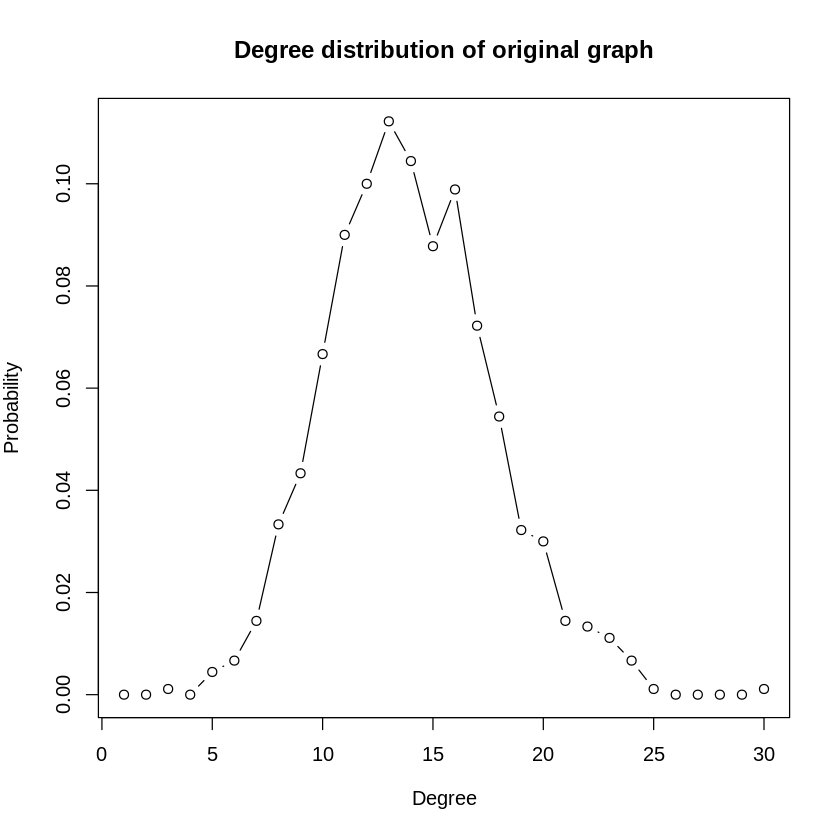

In [14]:
plot(degrees, degree_freq, type="b", main="Degree distribution of end nodes of random walk", xlab=TeX('Degree'), ylab=TeX('Probability'))
plot(degree_distribution(g), type="b", main="Degree distribution of original graph", xlab=TeX('Degree'), ylab=TeX('Probability'))

In [15]:
png(sprintf("plots/part2_degree_end_nodes.png"))
plot(degrees, degree_freq, type="b", main="Degree distribution of end nodes of random walk", xlab=TeX('Degree'), ylab=TeX('Probability'))
dev.off()
png(sprintf("plots/part2_q1_c_degree_original.png"))
plot(degree_distribution(g), type="b", main="Degree distribution of original graph", xlab=TeX('Degree'), ylab=TeX('Probability'))
dev.off()

png 
  2

png 
  2

## Q1 (d)

In [17]:
g1 <- sample_gnp(n=9000, p =0.015, directed=F)

In [18]:
res1 <- perform_random_walk(g1)

ERROR: Error in shortest.paths(g, vert_seq, start_v): 


In [ ]:
list[shortest_dists1,not_used, end_node_deg1] = res1

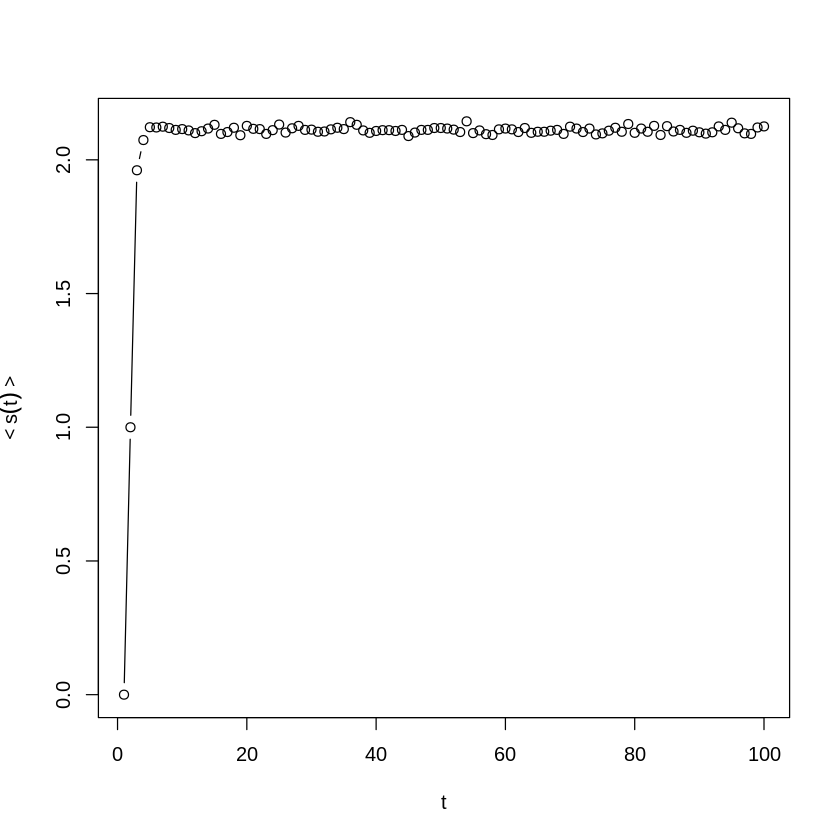

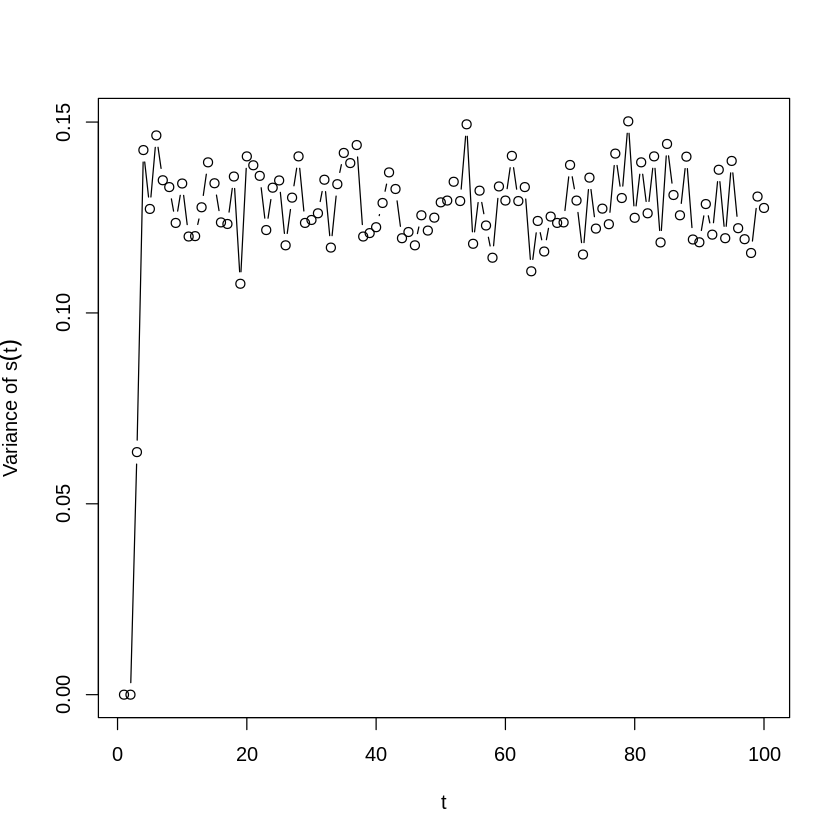

In [ ]:
plot(colMeans(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
plot(colVars(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))

In [26]:
png(sprintf("plots/q1_st_big_g.png"))
plot(colMeans(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))

dev.off()
png(sprintf("plots/q1_var_st_big_g.png"))
plot(colVars(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

In [39]:
diameter(g)
diameter(g1)

[1] 4

[1] 3

## Q2

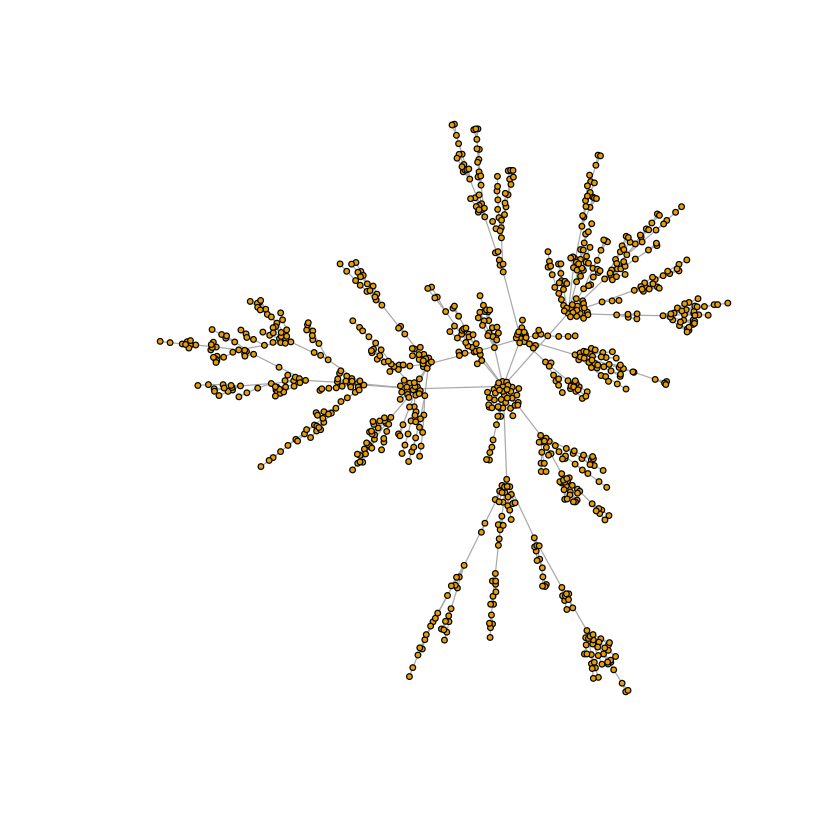

In [20]:
ga <- sample_pa(n=900, m=1, directed=F)
plot(ga, vertex.size=2, vertex.label=NA)

In [21]:
png(sprintf("plots/q2_2_a.png"))
plot(ga, vertex.size=2, vertex.label=NA)
dev.off()

png 
  2

## (b)

In [22]:
list[gg_shortest_dists, end_node_deg_ga] <- perform_random_walk(ga, steps=800)

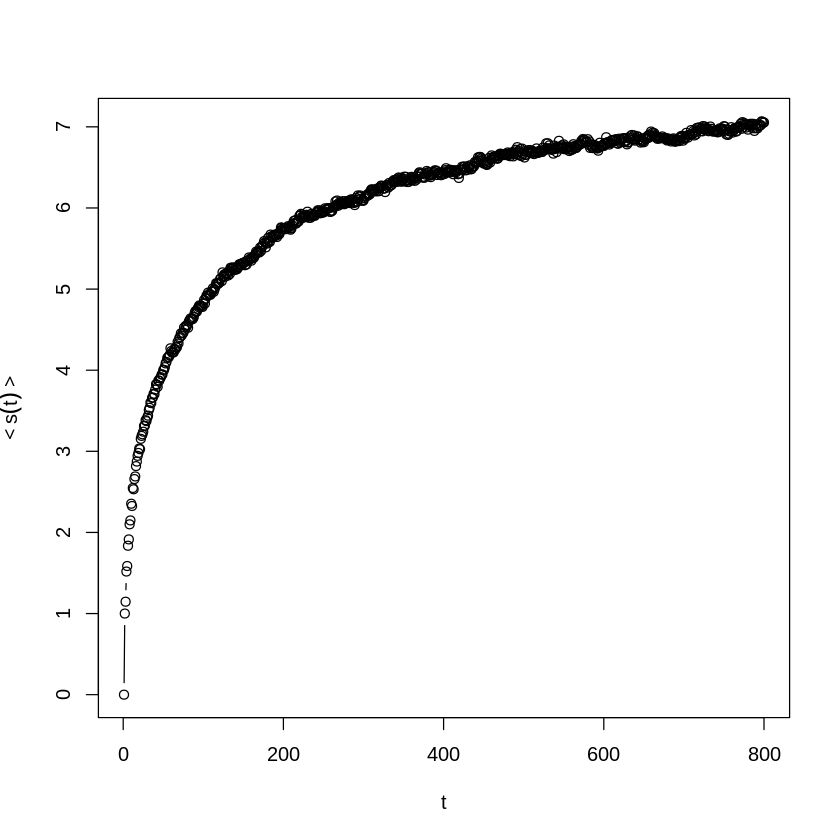

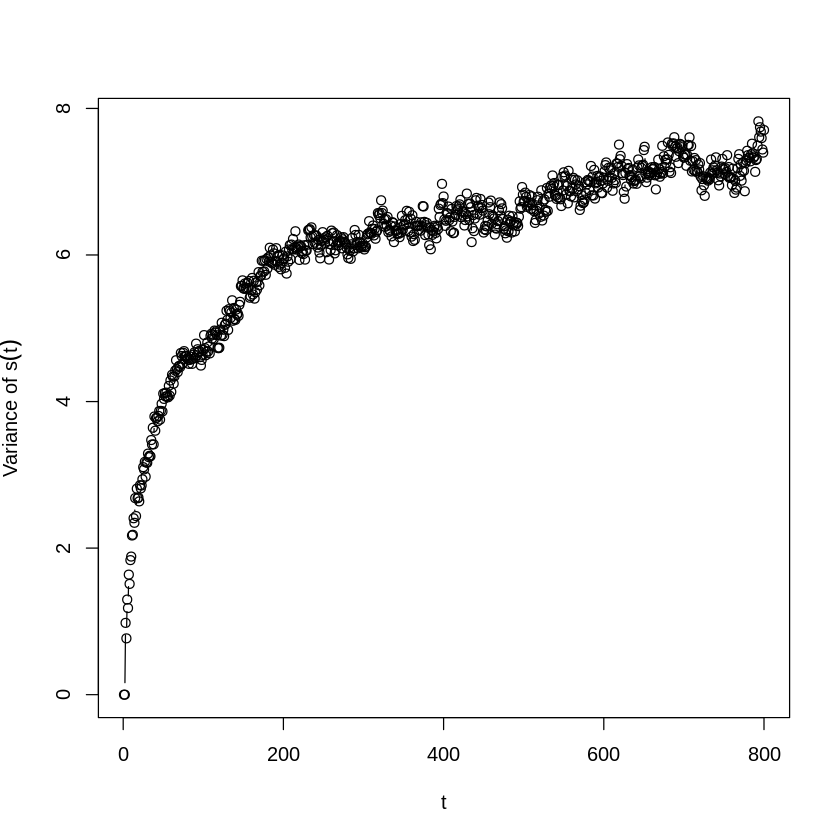

In [52]:
plot(colMeans(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
plot(colVars(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))

In [51]:
png(sprintf("plots/q2_2_mean_st.png"))
plot(colMeans(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/q2_2_var_st.png"))
plot(colVars(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

## (C)

In [23]:
ga_end_degrees = as.numeric(names(table(end_node_deg_ga)))
ga_end_degree_freq = as.vector(table(end_node_deg_ga))

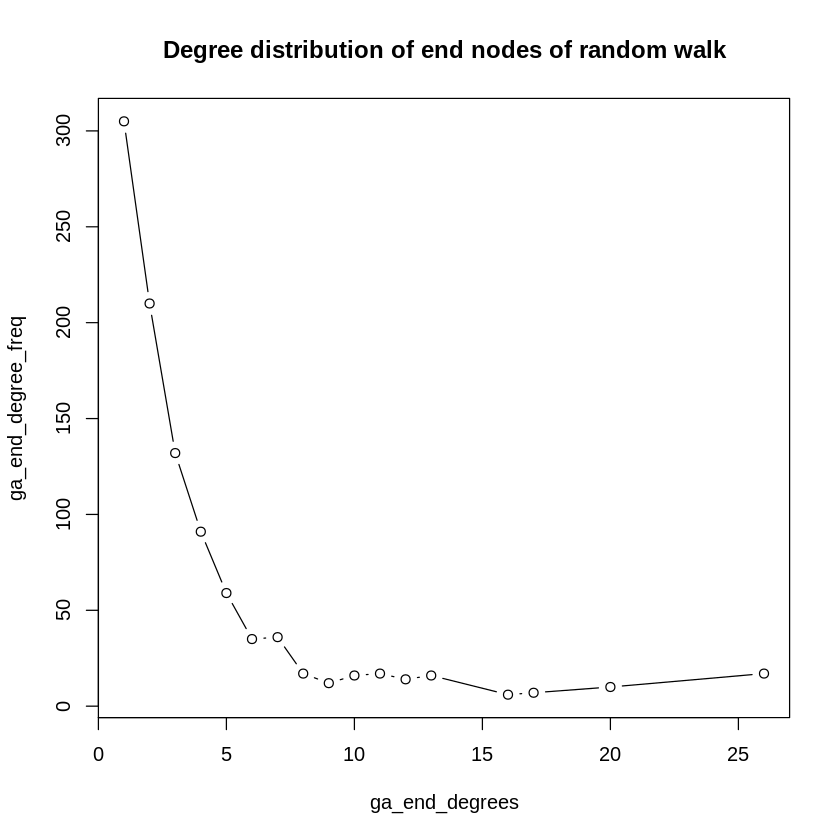

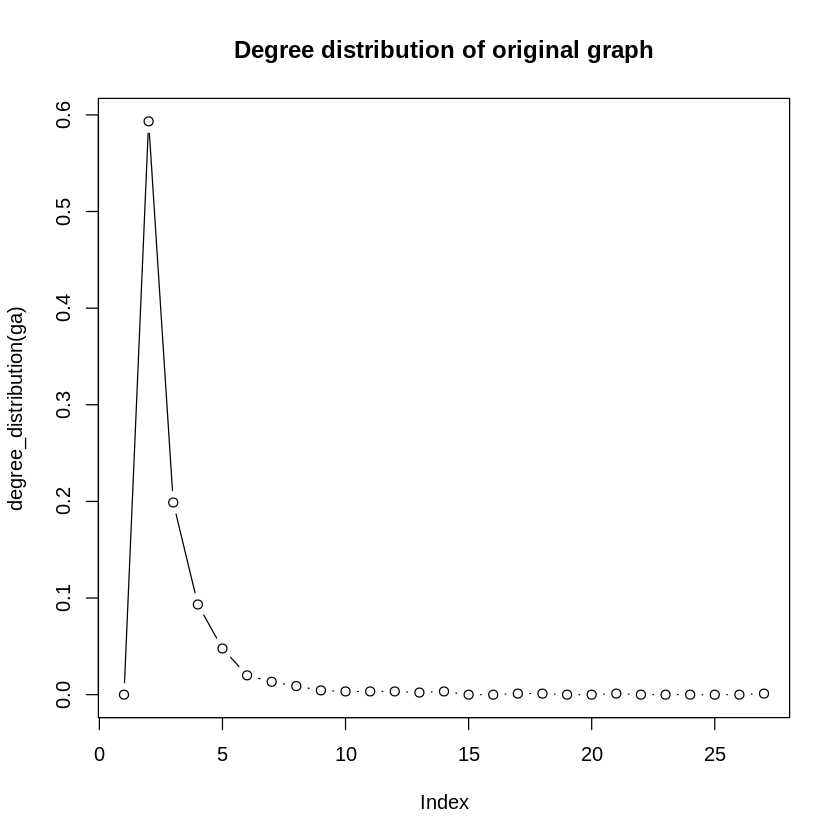

In [24]:
plot(ga_end_degrees, ga_end_degree_freq, type="b", main="Degree distribution of end nodes of random walk")
plot(degree_distribution(ga), type="b", main="Degree distribution of original graph")

In [25]:
png(sprintf("plots/q2_2_d_end_node_degree_dist.png"))
plot(ga_end_degrees, ga_end_degree_freq, type="b", main="Degree distribution of end nodes of random walk")

dev.off()
png(sprintf("plots/q2_2_original_node_degree_dist.png"))
plot(degree_distribution(ga), type="b", main="Degree distribution of original graph")
dev.off()

png 
  2

png 
  2

In [59]:
ga_small = sample_pa(n=90, m=1, directed=F)
ga_big = sample_pa(n=900, m=1, directed=F)

In [65]:
list[shortest_dists_small, not_used] <- perform_random_walk(ga_small, steps=800)
list[shortest_dists_big, not_used] <- perform_random_walk(ga_big, steps=800)

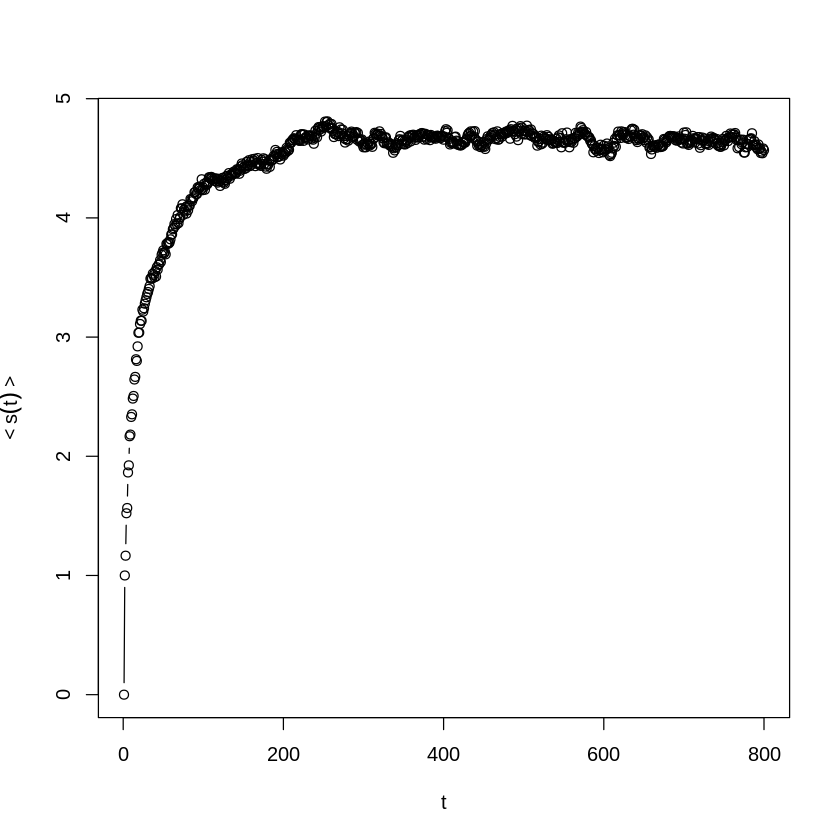

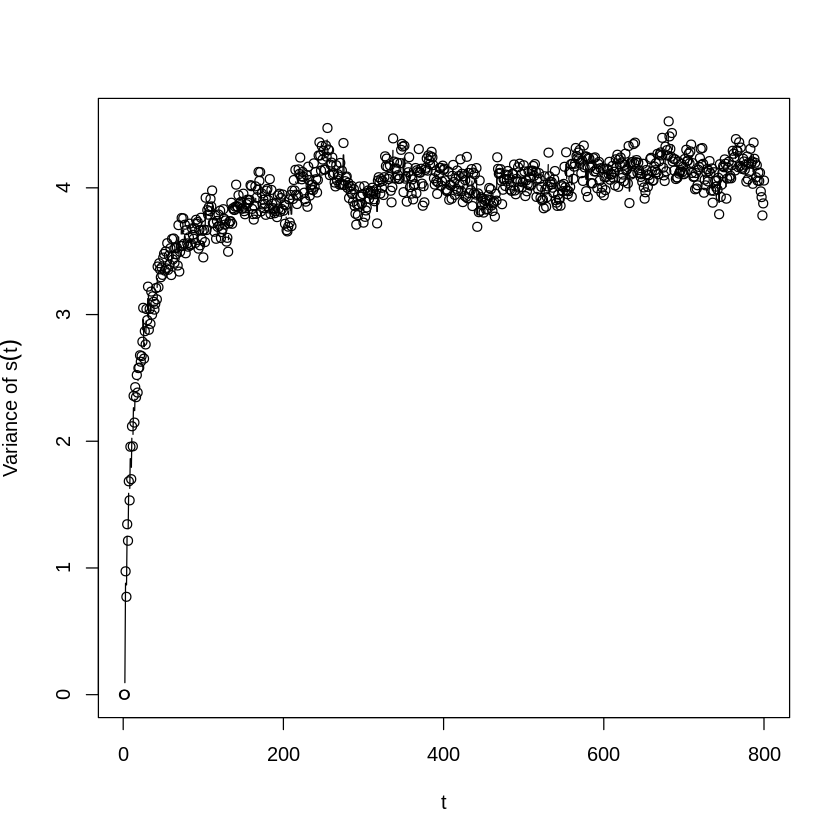

In [62]:
plot(colMeans(shortest_dists_small), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
plot(colVars(shortest_dists_small), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))

In [67]:
png(sprintf("plots/q2_2_d_mean_st_small.png"))
plot(colMeans(shortest_dists_small), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/p1q2_2_d_var_st_small.png"))
plot(colVars(shortest_dists_small), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

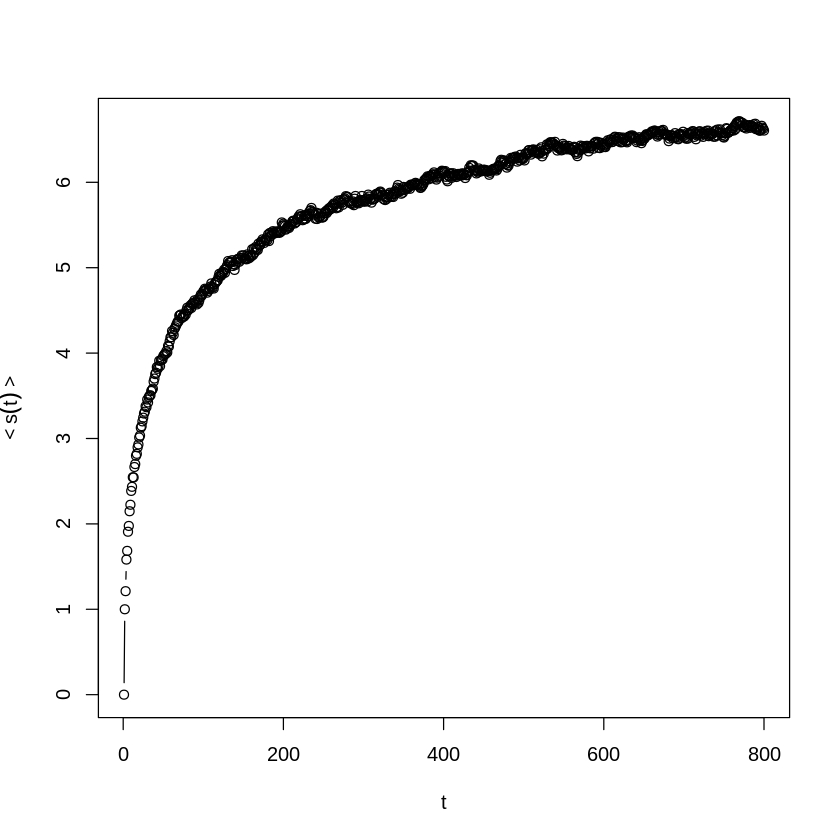

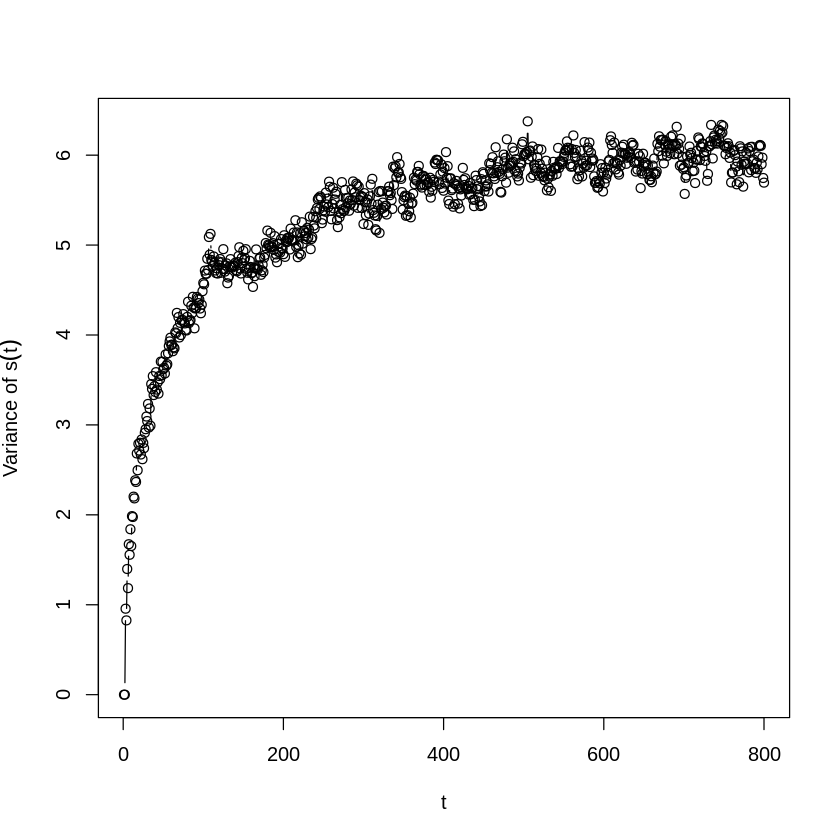

In [66]:
plot(colMeans(shortest_dists_big), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
plot(colVars(shortest_dists_big), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))

In [69]:
png(sprintf("plots/q2_2_d_mean_st_big.png"))
plot(colMeans(shortest_dists_big), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/q2_2_d_var_st_big.png"))
plot(colVars(shortest_dists_big), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

In [70]:
diameter(ga)

[1] 18

In [71]:
diameter(ga_small)
diameter(ga_big)

[1] 12

[1] 18

In [5]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    if(!is_connected(g)){
        print("Not connected")
    }
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [6]:
random_walk_custom = function(g, num_steps, start_node, 
transition_matrix = NULL, teleportation=0.0, teleport_visit_mode="equal"
){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    if(!is_connected(g)){
        print("Not connected")
    }
    vert_seq = array(NA, num_steps)

    if (is.null(transition_matrix)){
        transition_matrix = create_transition_matrix(g)
    }
    # transition_matrix = create_transition_matrix(g)
    
    if (teleport_visit_mode == 'pagerank'){
        # print("pagerank")
        pg_ranks = page_rank(g, )$vector
        visit_probs = pg_ranks / sum(pg_ranks)
    }
    else if (teleport_visit_mode == 'pagerank_median'){
        pg_ranks=page_rank(g, directed=T)$vector
        df = data.frame("idx"=1:vcount(g), "val"=pg_ranks)
        df=df[order(df$val),]
        visit_probs=array(0, vcount(g))
        mid=vcount(g) %/% 2
        visit_probs[df$idx[mid:mid+1]]=0.5
    }
    else if (teleport_visit_mode == 'equal'){
        visit_probs = array(1/vcount(g), vcount(g))
    }
    else{
        print("Invalid teleport_visit_mode")
    }
    for (i in 1:num_steps){
        if (runif(1) < teleportation){
            v = sample(1:vcount(g), 1, prob=visit_probs)
        }
        else{
            probs = transition_matrix[start_node, ]
            v = sample(1:vcount(g), 1, prob=probs)

        }
        vert_seq[i] = v
    }
    return (vert_seq)
}

In [7]:
perform_random_walk_custom = function(g, steps, iters, teleportation=0.0, teleport_visit_mode="equal"){
    n_node_visits=array(0, vcount(g))
    n_steady_state = ceiling(log(vcount(g)))
    for(i in 1:iters){
        start_vert = sample(1:vcount(g), 1)
        vert_seq = random_walk_custom(g, steps, start_vert, teleportation=teleportation, teleport_visit_mode=teleport_visit_mode)
        for (j in 1:length(vert_seq)) {
            if (j > n_steady_state) {
                n_node_visits[vert_seq[j]] = n_node_visits[vert_seq[j]] + 1
            }
        }
    }
    return (n_node_visits / ((steps-n_steady_state) * iters))
}

## Q(3)

In [2]:
g1  = sample_pa(n = 900, m = 4, directed = T)
g2 = sample_pa(n = 900, m= 4, directed = T)

In [3]:
g2_permuted  = permute(g2, sample(V(g2)))
g1_added = add_edges(g1, c(t(as_edgelist(g2_permuted))))

In [4]:
ecount(g1_added)

[1] 7180

In [9]:
iters=100
steps = 1000

In [10]:
node_visits_probs=perform_random_walk_custom(g1_added, steps, iters)

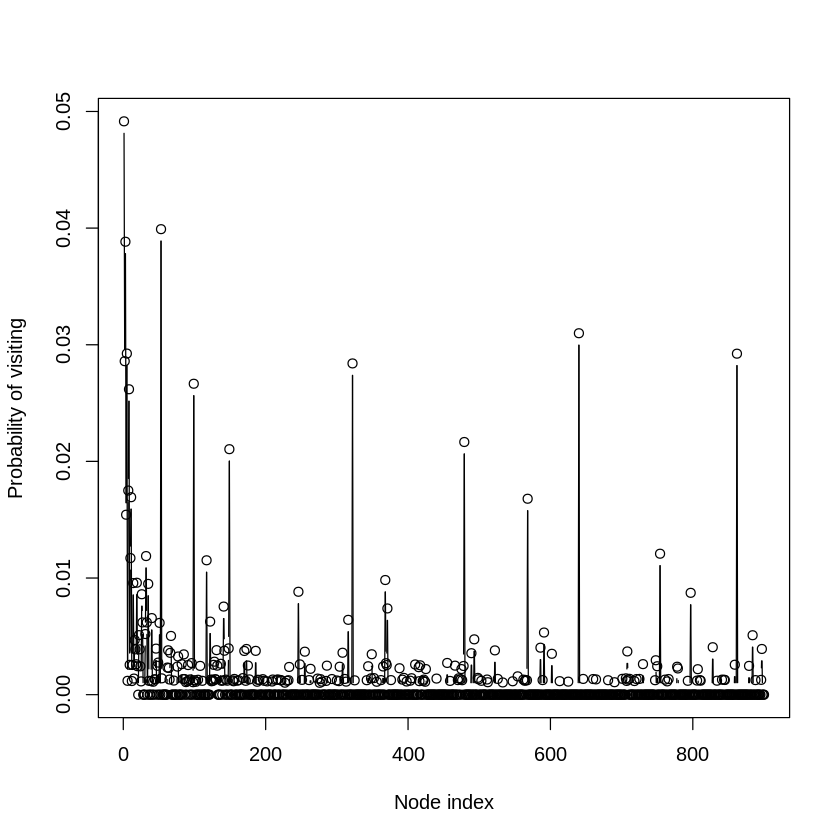

In [90]:
plot(node_visits_probs, type="b", xlab='Node index', ylab='Probability of visiting')

In [12]:
png(sprintf("plots/q2_3_a_prob_visisting.png"))
plot(node_visits_probs, type="b", xlab='Node index', ylab='Probability of visiting')
dev.off()

png 
  2

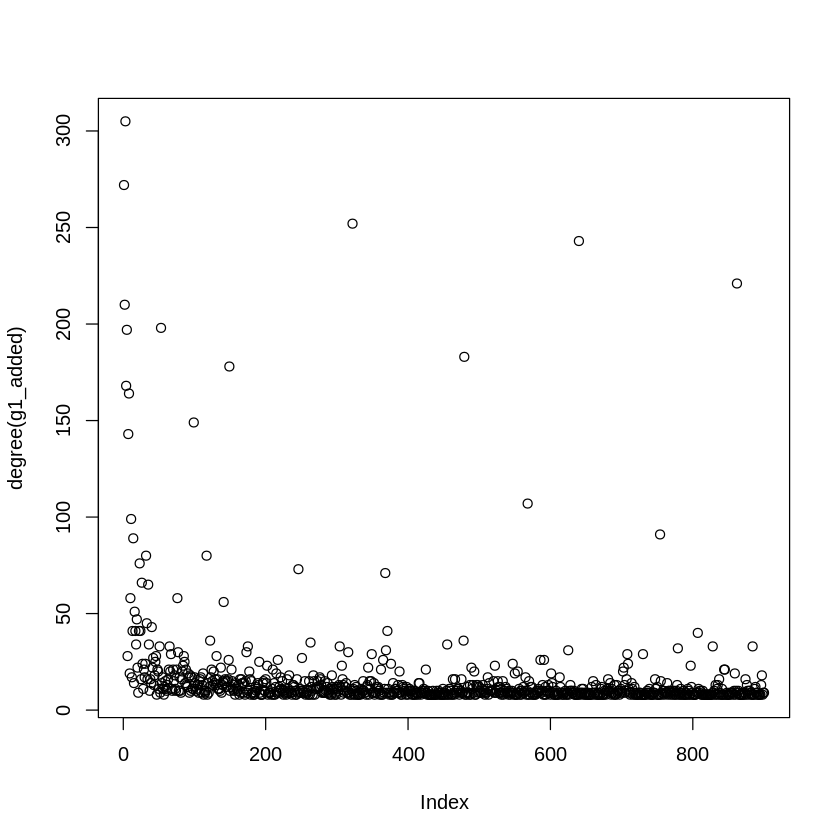

In [92]:
plot(degree(g1_added))

In [13]:
png(sprintf("plots/q2_3_a_prob_visisting_degree.png"))
plot(degree(g1_added), node_visits_probs, xlab='Degree', ylab='Probability of visiting')
dev.off()

png 
  2

In [ ]:
plot(degree(g1_added), node_visits_probs, xlab='Degree', ylab='Probability of visiting')

In [95]:
fit_line = function(x, y, log=FALSE){
    if(log){
        slope <- getElement(lm(log(y) ~ log(x))$coefficients[2], "log(x)")
        intercept <- getElement(lm(log(y) ~ log(x))$coefficients[1], "(Intercept)")
    }
    else{
        slope <- getElement(lm(y ~ x)$coefficients[2], "x")
        intercept <- getElement(lm(y ~ x)$coefficients[1], "(Intercept)")
    }
    return (list(slope, intercept))
}

[1] 0.0001454878
[1] 0.960171


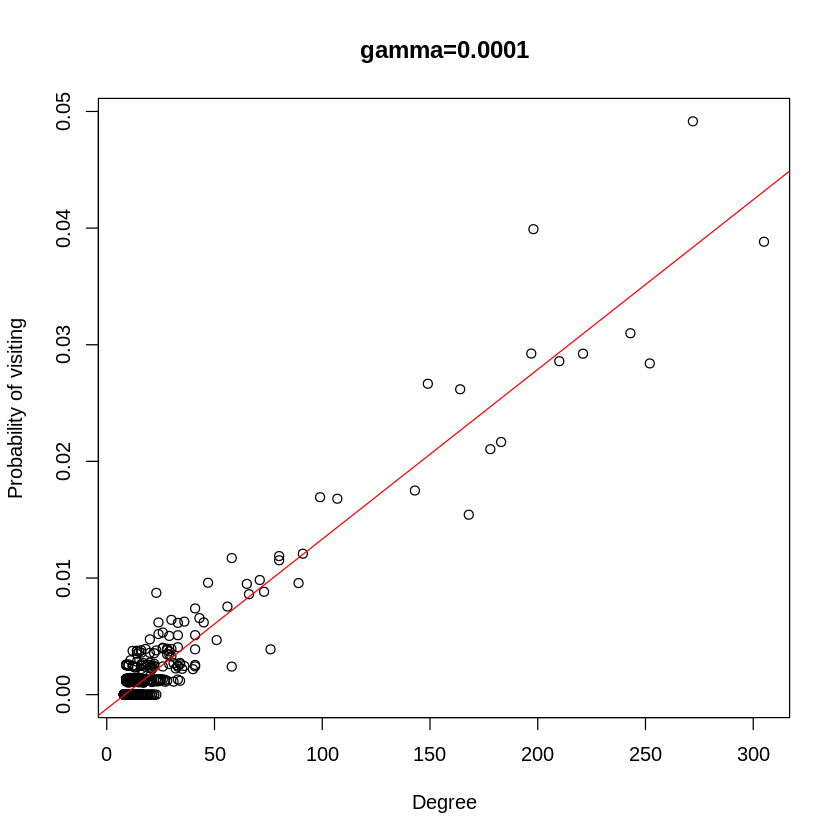

In [97]:
list[slope, d] <- fit_line(degree(g1_added), node_visits_probs)
print(slope)
plot(degree(g1_added), node_visits_probs, xlab='Degree', 
ylab='Probability of visiting',main=sprintf("gamma=%.4f", slope))
abline(lm(node_visits_probs ~ degree(g1_added)), col="red")
print(cor(degree(g1_added), node_visits_probs))

In [99]:
png(sprintf("plots/q2_3_a_slope_degree.png"))
plot(degree(g1_added), node_visits_probs, xlab='Degree', ylab='Probability of visiting')
dev.off()

png 
  2

## (B)

In [14]:
iters=100
steps=1000
alpha=0.2
node_visits_probs_equal=perform_random_walk_custom(g1_added, steps, iters, teleportation=alpha, teleport_visit_mode="equal")

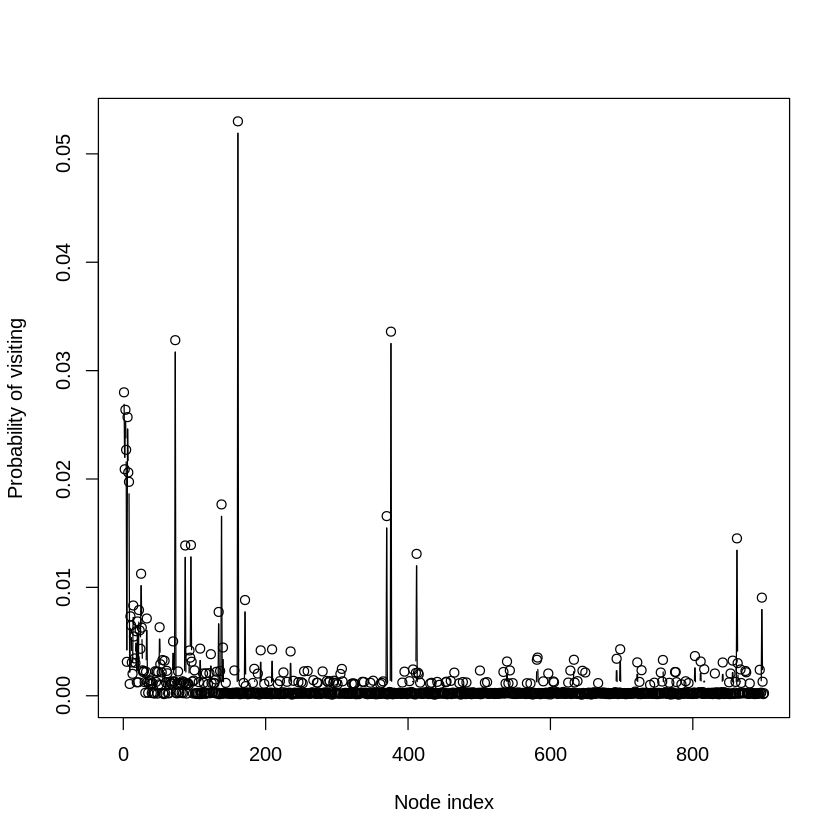

In [15]:
plot(node_visits_probs_equal, type="b", xlab='Node index', ylab='Probability of visiting')

In [16]:
png(sprintf("plots/q2_3_b_teleported_index.png"))
plot(node_visits_probs_equal, type="b", xlab='Node index', ylab='Probability of visiting')
dev.off()

png 
  2

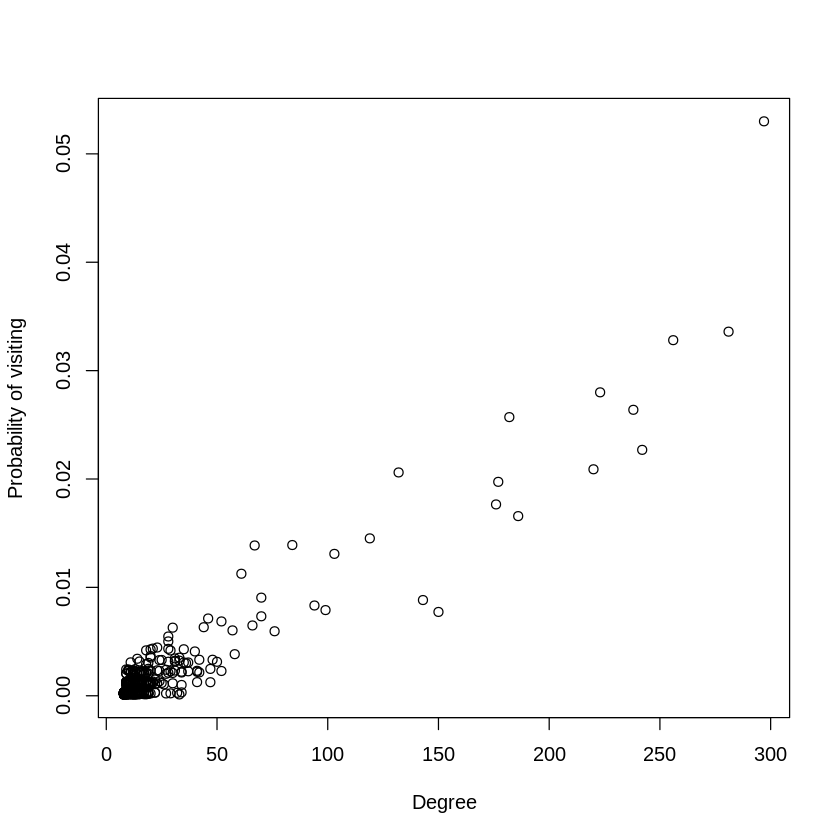

In [17]:
plot(degree(g1_added), node_visits_probs_equal, xlab='Degree', ylab='Probability of visiting')

In [18]:
png(sprintf("plots/q2_3_b_teleported_degree.png"))
plot(degree(g1_added), node_visits_probs_equal, xlab='Degree', ylab='Probability of visiting')
dev.off()

png 
  2

[1] 0.000113981
[1] 0.9615753


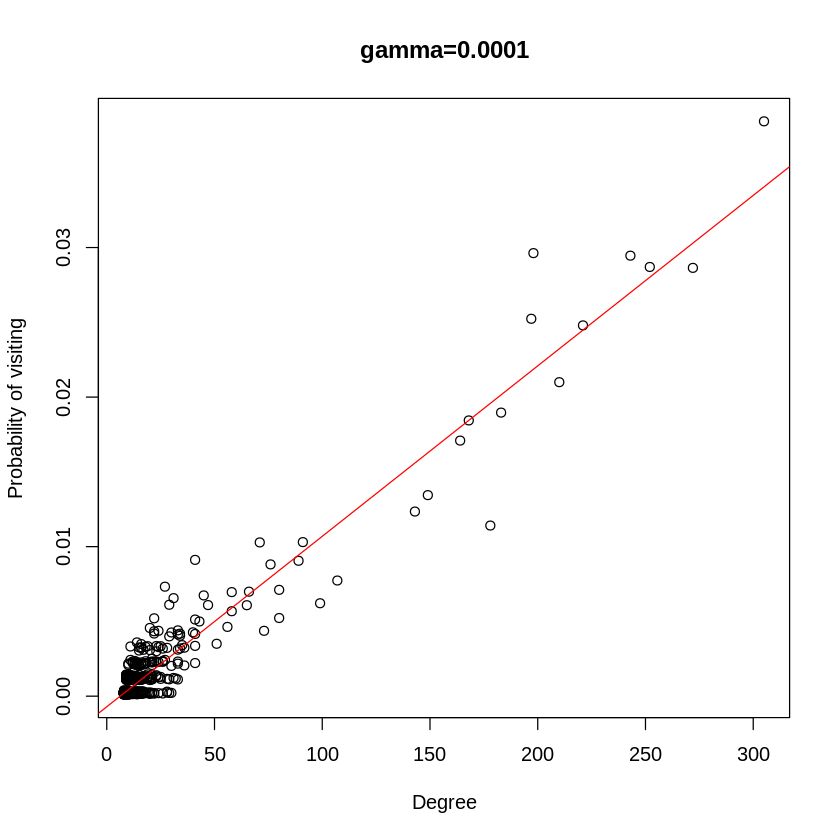

In [107]:
list[slope_equal, d] <- fit_line(degree(g1_added), node_visits_probs_equal)
print(slope_equal)
plot(degree(g1_added), node_visits_probs_equal, xlab='Degree', ylab='Probability of visiting',main=sprintf("gamma=%.4f", slope_equal))
abline(lm(node_visits_probs_equal ~ degree(g1_added)), col="red")
print(cor(degree(g1_added), node_visits_probs_equal))

In [109]:
png(sprintf("plots/q2_3_b_teleported.png"))
plot(degree(g1_added), node_visits_probs_equal, xlab='Degree', ylab='Probability of visiting')
dev.off()

png 
  2

## Q(4)

In [19]:

node_visits_probs_pg=perform_random_walk_custom(g1_added, steps, iters, teleportation=alpha, teleport_visit_mode="pagerank")

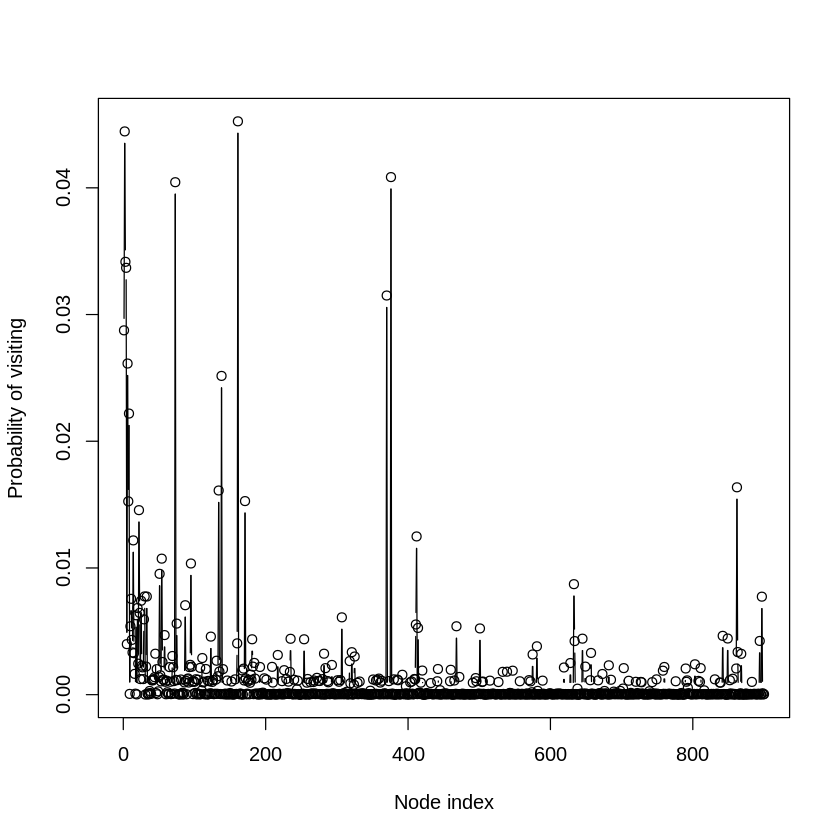

In [20]:
plot(node_visits_probs_pg, type="b", xlab='Node index', ylab='Probability of visiting')

In [21]:
png(sprintf("plots/q2_4_a_prob_visiting.png"))
plot(node_visits_probs_pg, type="b", xlab='Node index', ylab='Probability of visiting')
dev.off()

png 
  2

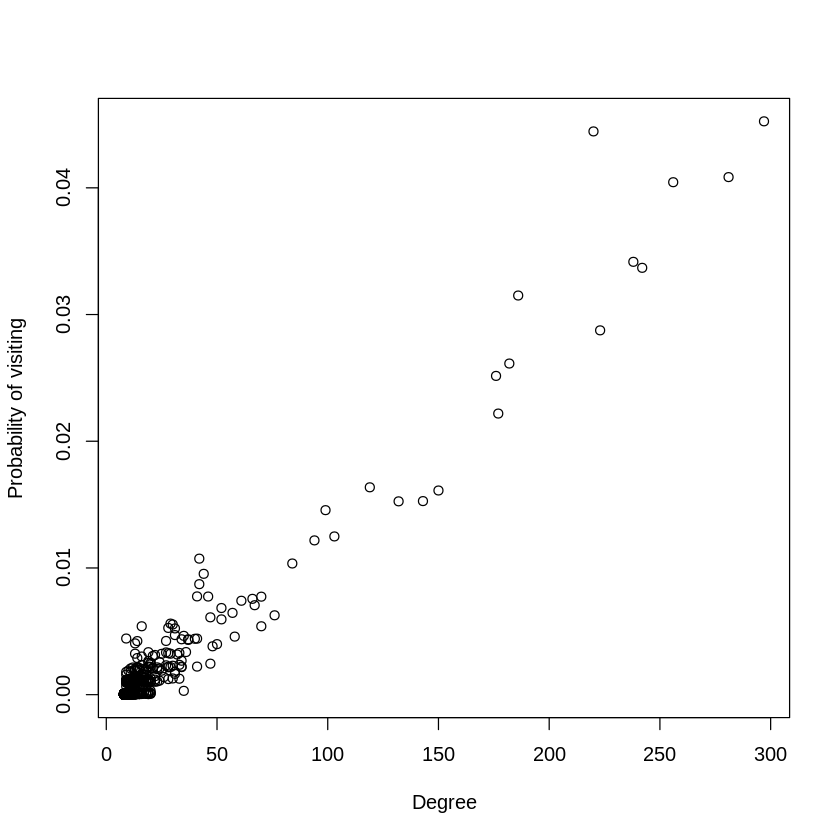

In [22]:
plot(degree(g1_added), node_visits_probs_pg, xlab='Degree', ylab='Probability of visiting')

In [23]:
png(sprintf("plots/q2_4_a_prob_visiting_degree.png"))
plot(degree(g1_added), node_visits_probs_pg, xlab='Degree', ylab='Probability of visiting')
dev.off()

png 
  2

[1] 0.0001393134
[1] 0.9606795


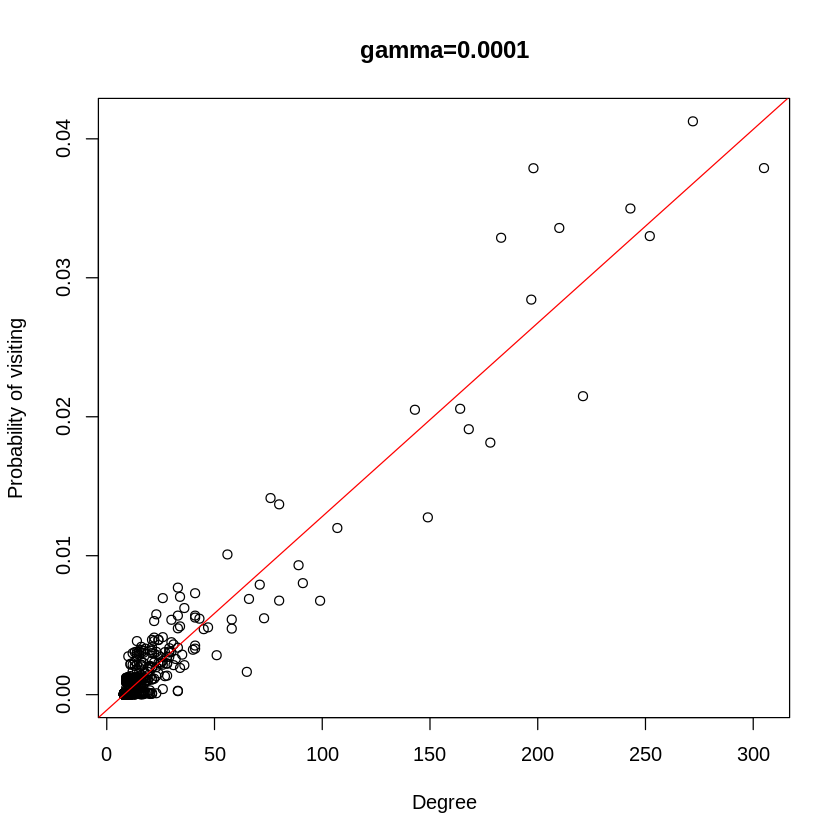

In [131]:
list[slope_pg, d] <- fit_line(degree(g1_added), node_visits_probs_pg)
print(slope_pg)
plot(degree(g1_added), node_visits_probs_pg, xlab='Degree', ylab='Probability of visiting',main=sprintf("gamma=%.4f", slope_pg))
abline(lm(node_visits_probs_pg ~ degree(g1_added)), col="red")
print(cor(degree(g1_added), node_visits_probs_pg))

In [24]:
n_node_visits_pg_median=perform_random_walk_custom(g1_added, steps, iters, teleportation=alpha, teleport_visit_mode="pagerank_median")

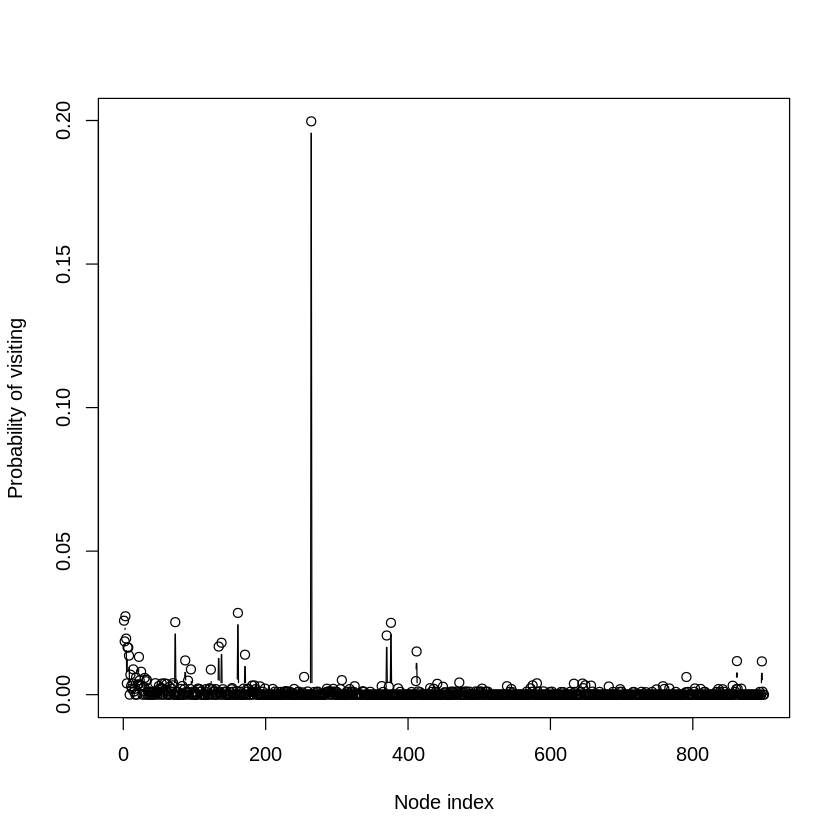

In [25]:
plot(n_node_visits_pg_median, type="b", xlab='Node index', ylab='Probability of visiting')

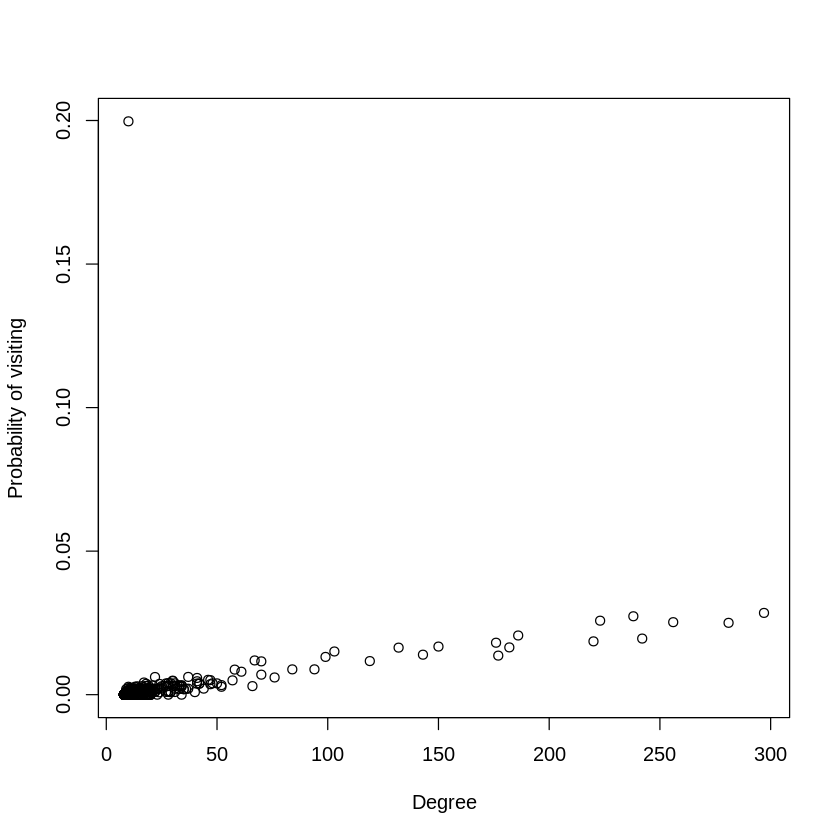

In [26]:
plot(degree(g1_added), n_node_visits_pg_median, xlab='Degree', ylab='Probability of visiting')

In [27]:
png(sprintf("plots/q2_4_b_prob_visiting.png"))
plot(n_node_visits_pg_median, type="b", xlab='Node index', ylab='Probability of visiting')
dev.off()

png(sprintf("plots/q2_4_b_prob_visiting_degree.png"))
plot(degree(g1_added), n_node_visits_pg_median, xlab='Degree', ylab='Probability of visiting')
dev.off()

png 
  2

png 
  2

[1] 0.0001112607
[1] 0.4058206


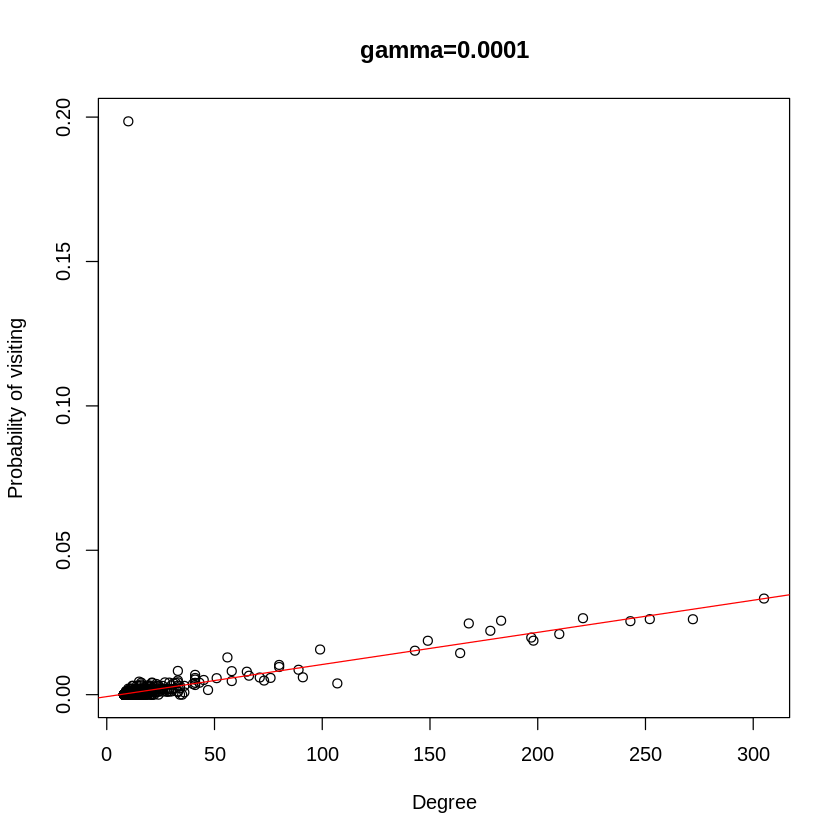

In [136]:
list[slope_pg_median, d] <- fit_line(degree(g1_added), n_node_visits_pg_median)
print(slope_pg_median)
plot(degree(g1_added), n_node_visits_pg_median, xlab='Degree', ylab='Probability of visiting',main=sprintf("gamma=%.4f", slope_pg_median))
abline(lm(n_node_visits_pg_median ~ degree(g1_added)), col="red")
print(cor(degree(g1_added), n_node_visits_pg_median))

In [137]:
png(sprintf("plots/p1q2_4_b_degree_prob_visit.png"))
plot(degree(g1_added), n_node_visits_pg_median, xlab='Degree', ylab='Probability of visiting')
dev.off()

png 
  2

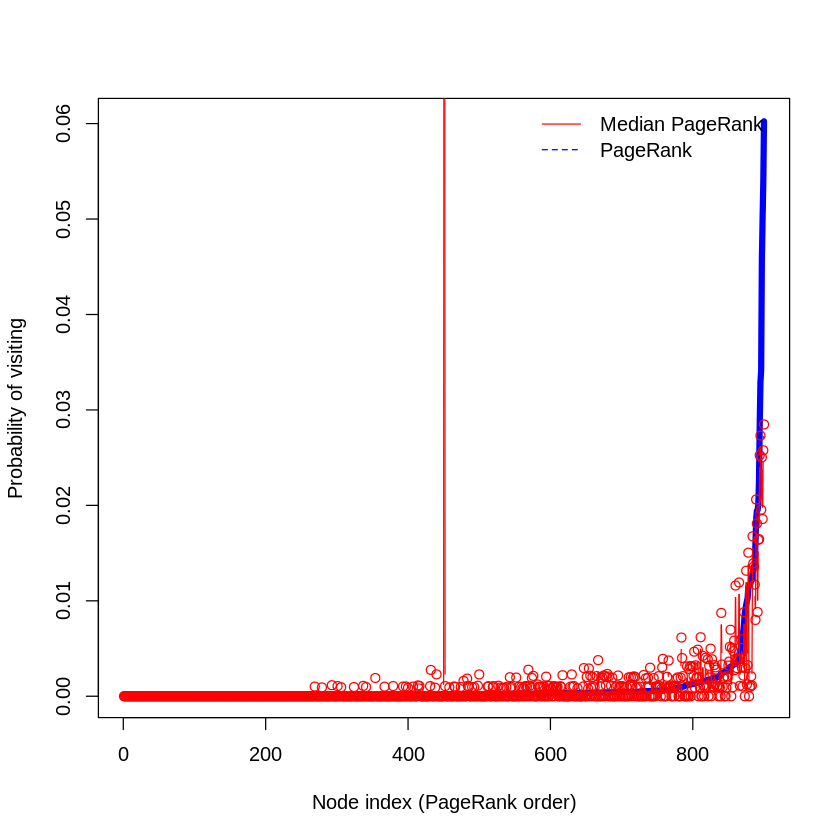

In [32]:
pageranks = page_rank(g1_added)$vector
plot(sort(pageranks), col="blue", type='l',lwd=5, xlab='Node index (PageRank order)', ylab='Probability of visiting')
lines(n_node_visits_pg_median[order(pageranks)], col="red", type='b')
legend("topright", legend = c("Median PageRank", "PageRank"), col = c("red", "blue"), bty = "n", lty=1:2, cex=1)

In [33]:
png(sprintf("plots/p1q2_4_b_pg_comparison.png"))
plot(sort(pageranks), col="blue", type='l',lwd=5, ylim=c(0,0.16), xlab='Node index (PageRank order)', ylab='Probability of visiting')
lines(n_node_visits_pg_median[order(pageranks)], col="red", type='b')
legend("topright", legend = c("Original PageRank", "Random walk PageRank"), col = c("red", "blue"), bty = "n", lty=1:2, cex=1)
dev.off()

png 
  2